Толстолуцкий Денис Александрович ИУ5-61Б


In [54]:
import pandas as pd
from sklearn.linear_model import LinearRegression

data = pd.read_csv("HRDataset_v14.csv")

In [55]:
data.head()

Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0       Adinolfi, Wilson  K  10026          0                0         1   
1  Ait Sidi, Karthikeyan     10084          1                1         1   
2         Akinkuolie, Sarah  10196          1                1         0   
3              Alagbe,Trina  10088          1                1         0   
4          Anderson, Carol   10069          0                2         0   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...  \
0            1       5            4                       0   62506  ...   
1            5       3            3                       0  104437  ...   
2            5       5            3                       0   64955  ...   
3            1       5            3                       0   64991  ...   
4            5       5            3                       0   50825  ...   

      ManagerName  ManagerID RecruitmentSource PerformanceScore  \
0  Michael Albert       22.0          LinkedIn          Exceeds   
1      Simon Roup        4.0            Indeed      Fully Meets   
2  Kissy Sullivan       20.0          LinkedIn      Fully Meets   
3    Elijiah Gray       16.0            Indeed      Fully Meets   
4  Webster Butler       39.0     Google Search      Fully Meets   

   EngagementSurvey EmpSatisfaction SpecialProjectsCount  \
0              4.60               5                    0   
1              4.96               3                    6   
2              3.02               3                    0   
3              4.84               5                    0   
4              5.00               4                    0   

  LastPerformanceReview_Date DaysLateLast30 Absences  
0                  1/17/2019              0        1  
1                  2/24/2016              0       17  
2                  5/15/2012              0        3  
3                   1/3/2019              0       15  
4                   2/1/2016              0        2  

[5 rows x 36 columns]

In [56]:
data.drop_duplicates()
data = data.drop("Employee_Name", axis=1)

In [57]:
data.dtypes

EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName                    object
ManagerID   

In [58]:
data.isnull().sum()

EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceScore                0
EngagementSurv

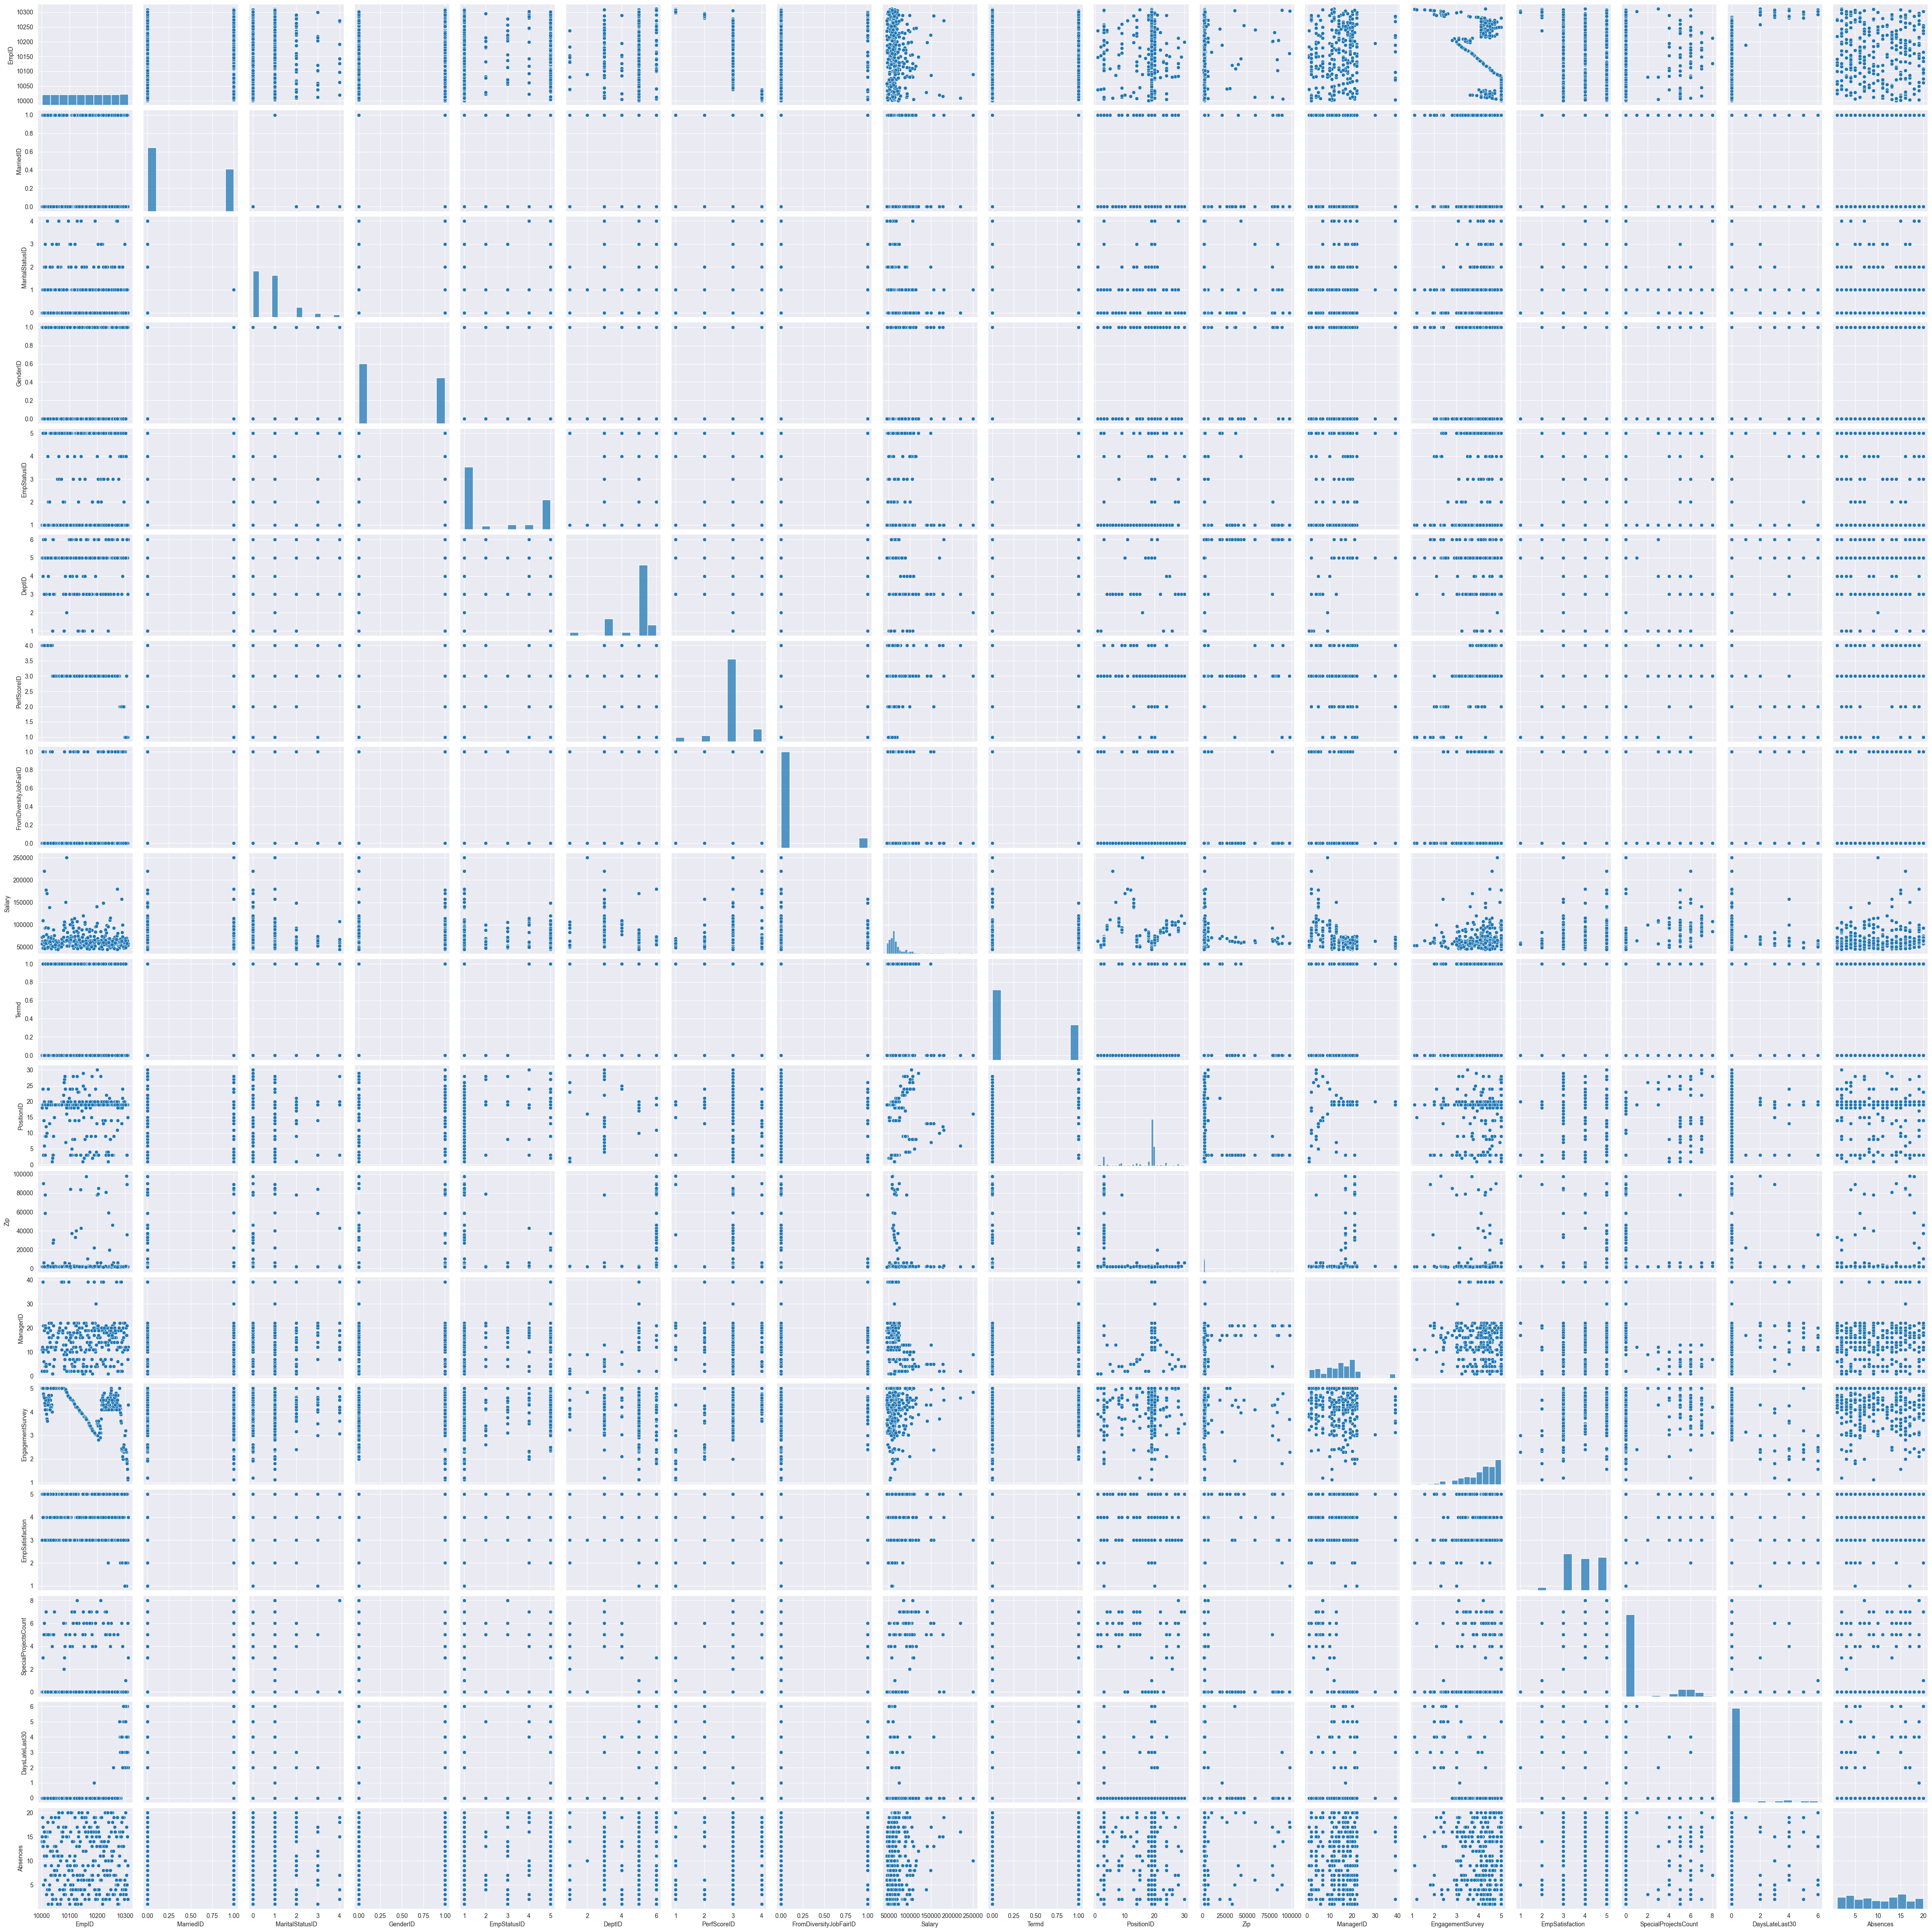

In [59]:
import seaborn as sns
sns.pairplot(data)

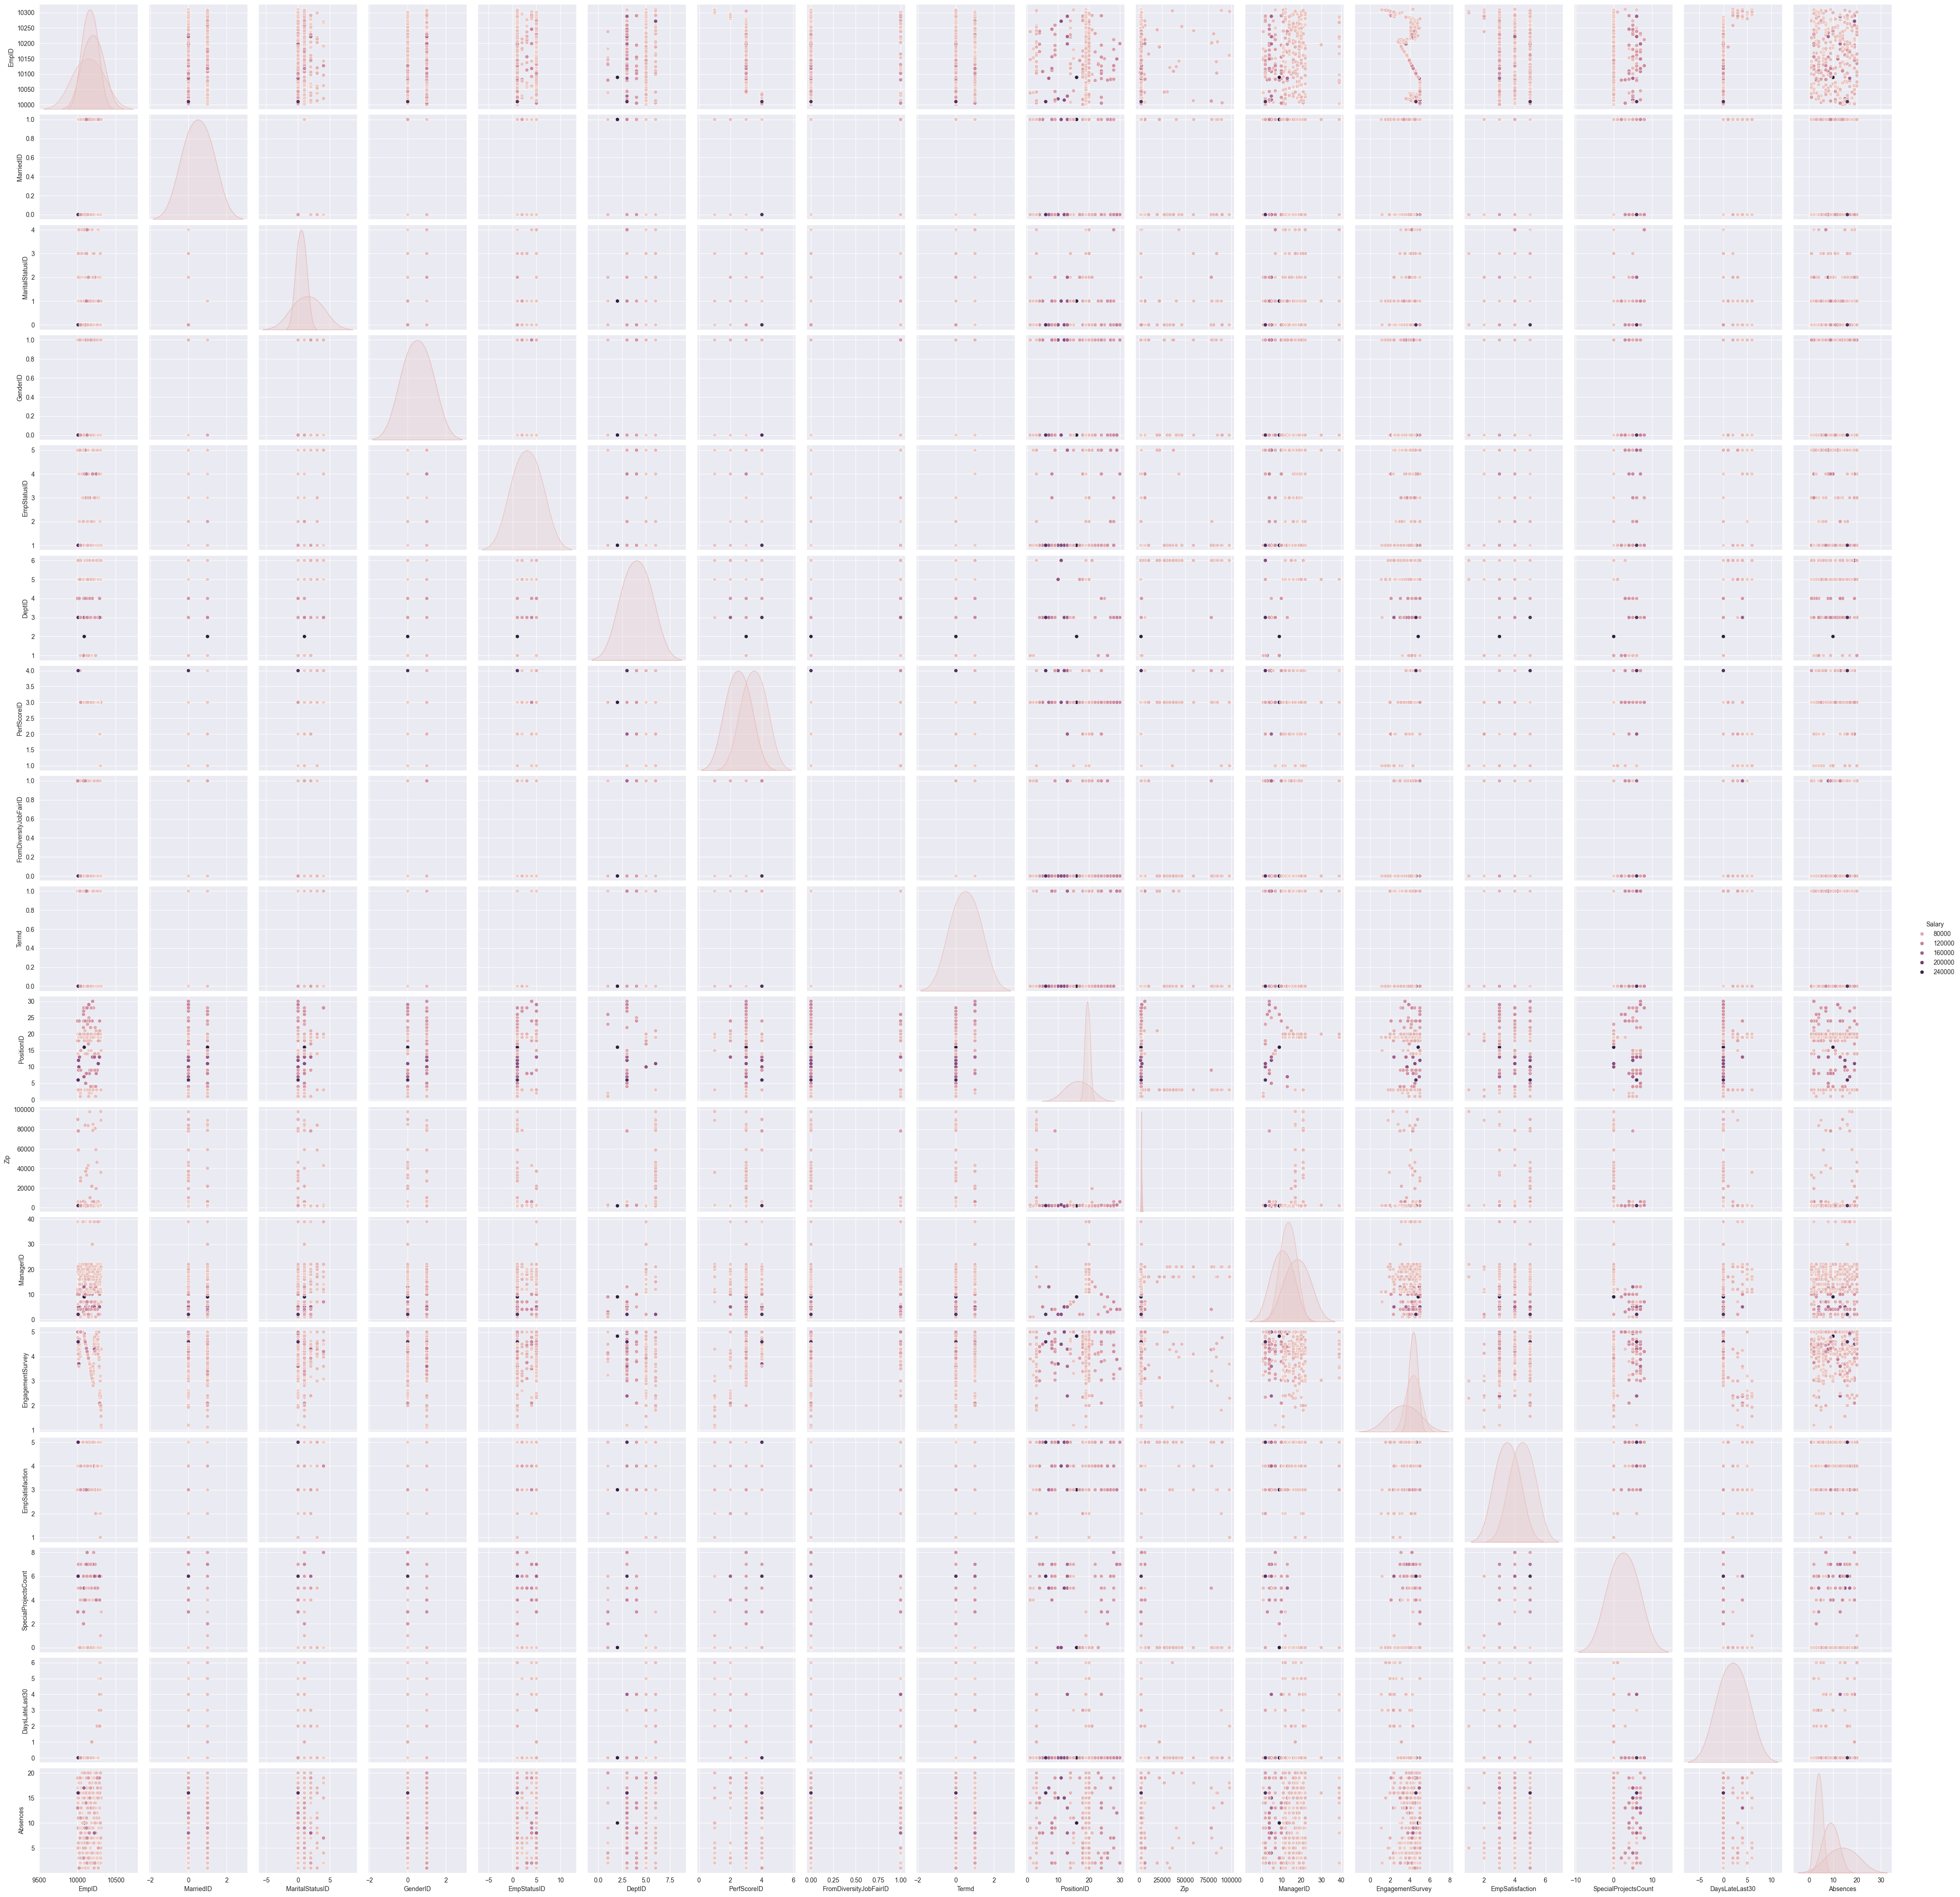

In [60]:
sns.pairplot(data, hue="Salary")

In [61]:
data.columns

Index(['EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID',
       'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd',
       'PositionID', 'Position', 'State', 'Zip', 'DOB', 'Sex', 'MaritalDesc',
       'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'DateofHire',
       'DateofTermination', 'TermReason', 'EmploymentStatus', 'Department',
       'ManagerName', 'ManagerID', 'RecruitmentSource', 'PerformanceScore',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences'],
      dtype='object')

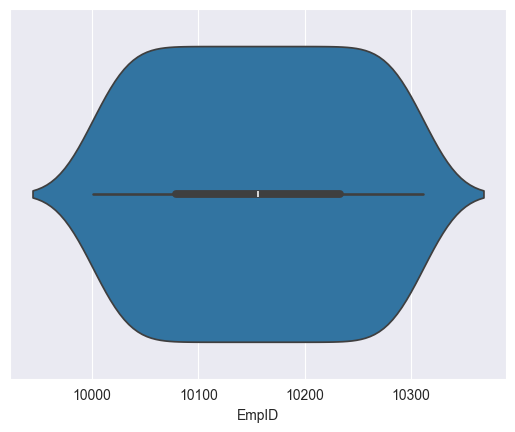

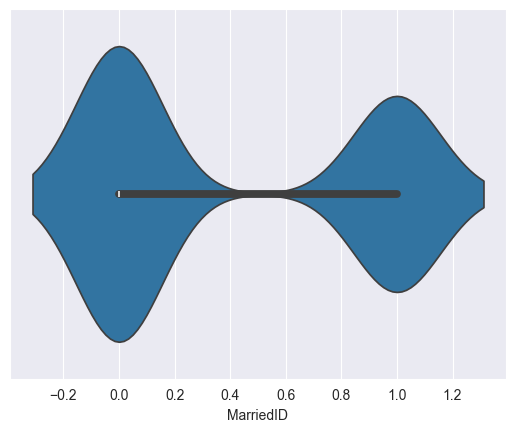

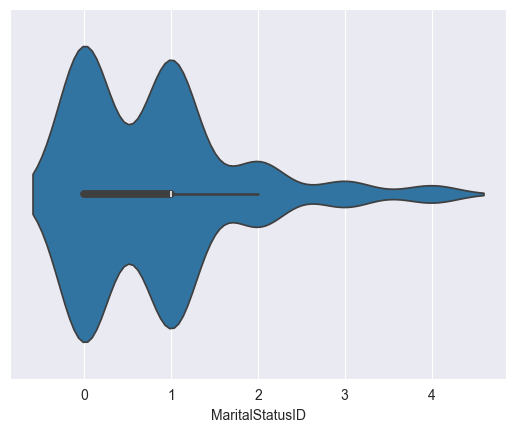

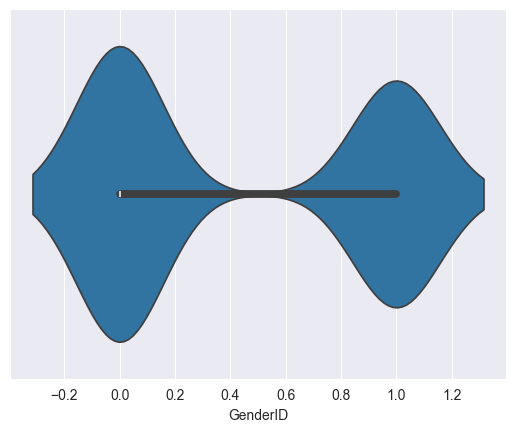

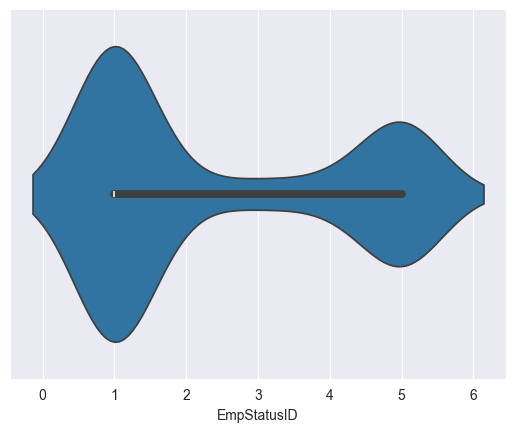

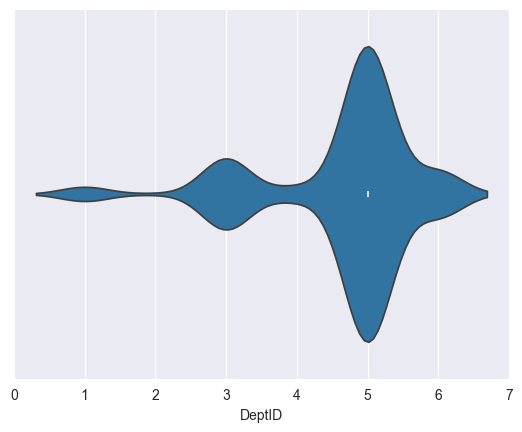

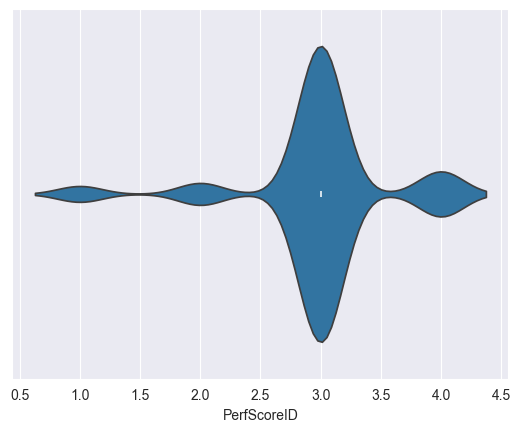

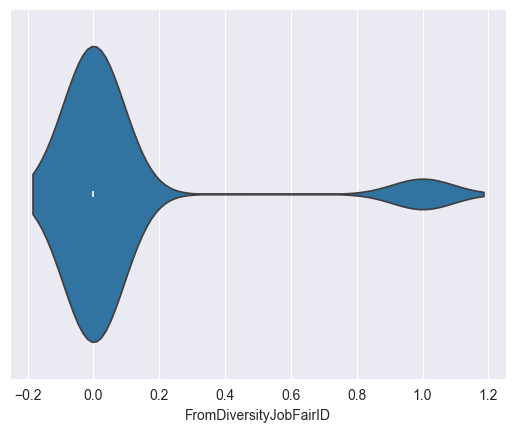

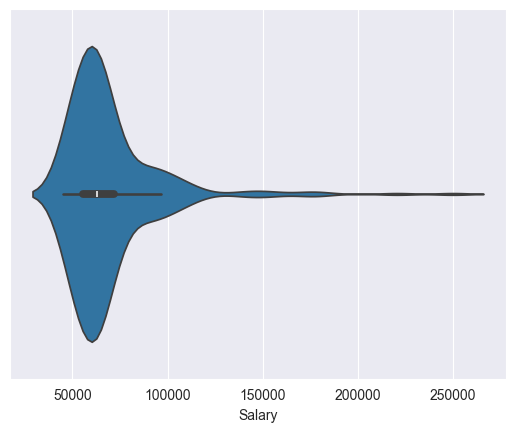

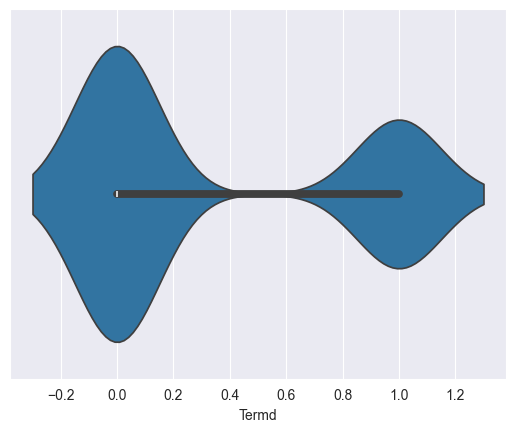

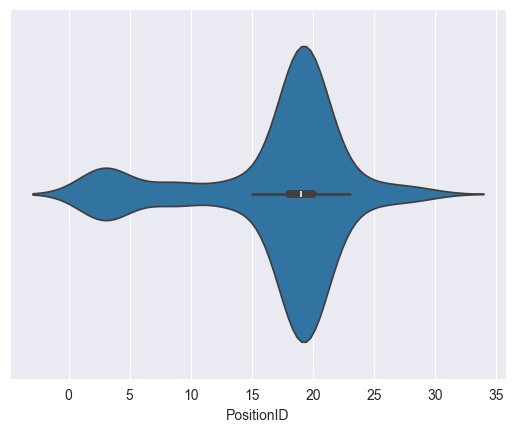

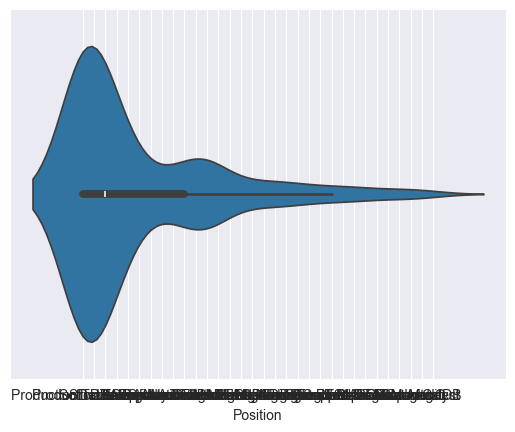

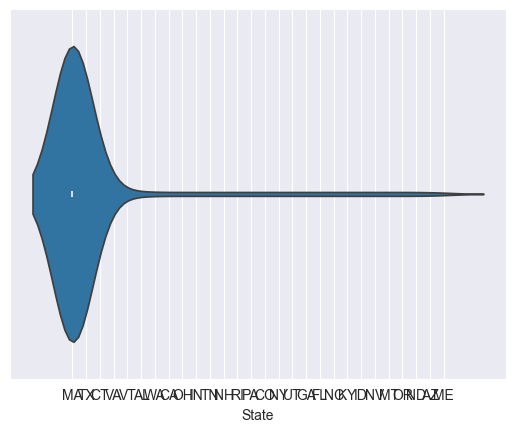

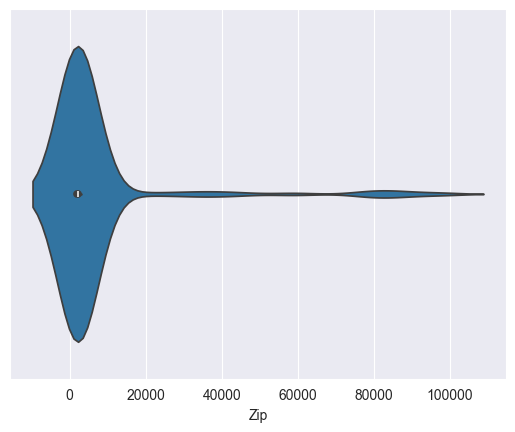

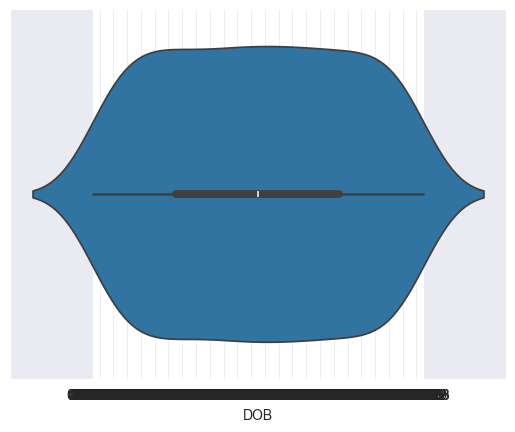

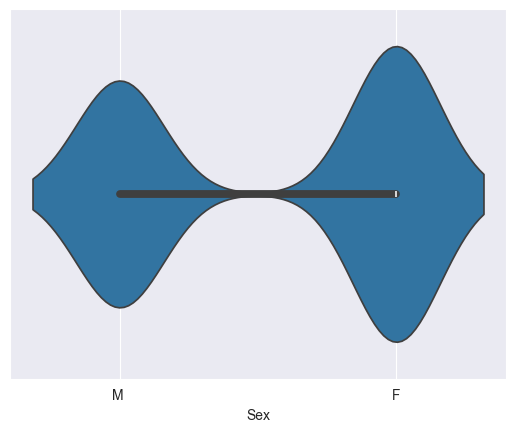

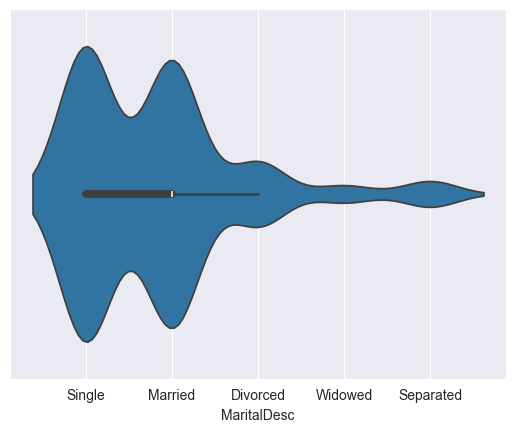

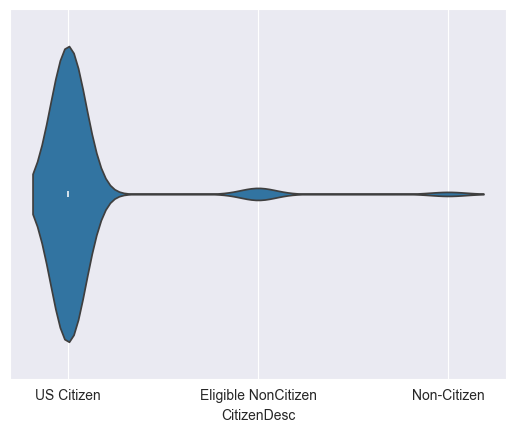

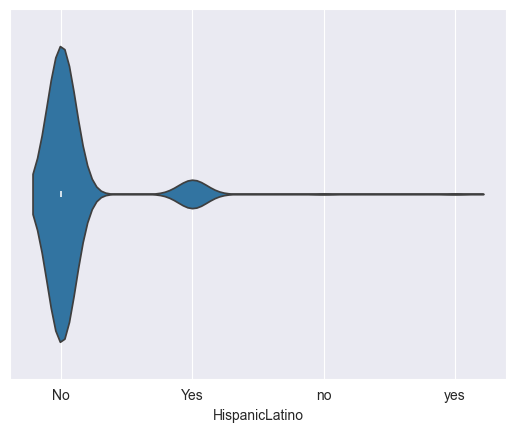

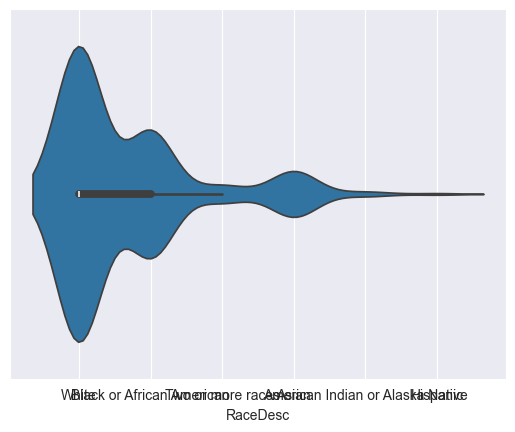

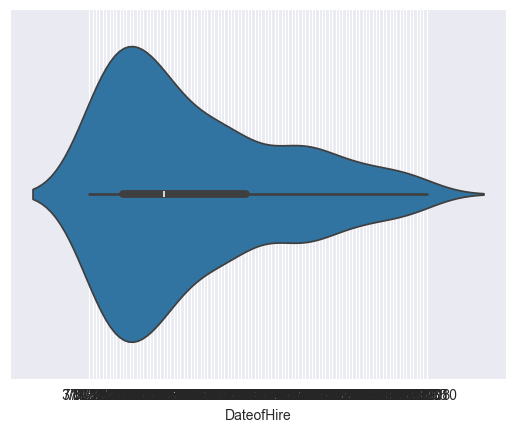

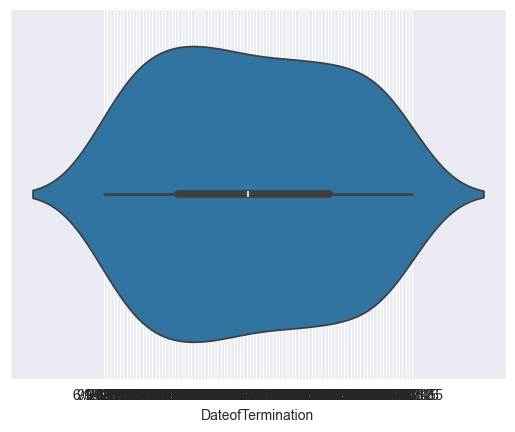

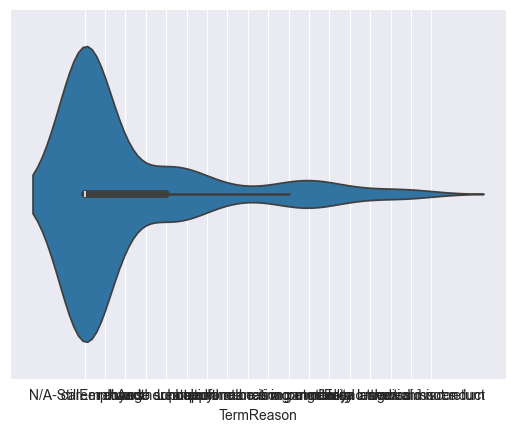

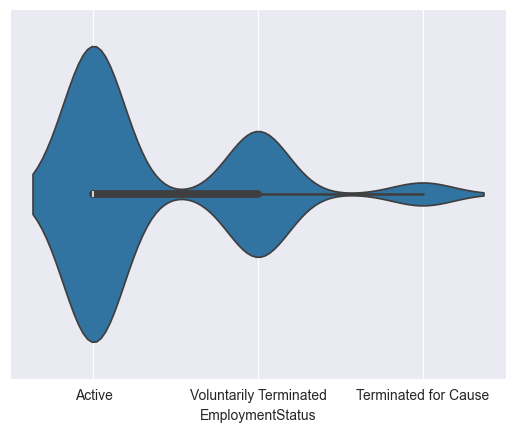

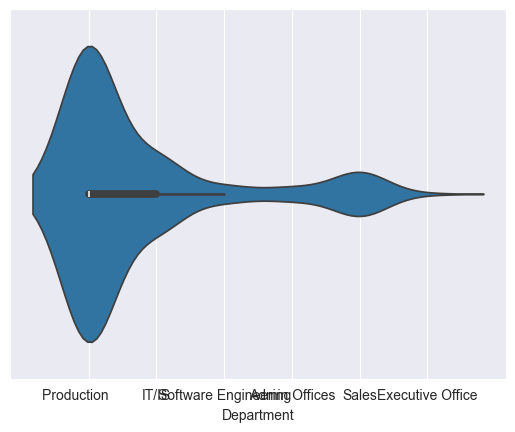

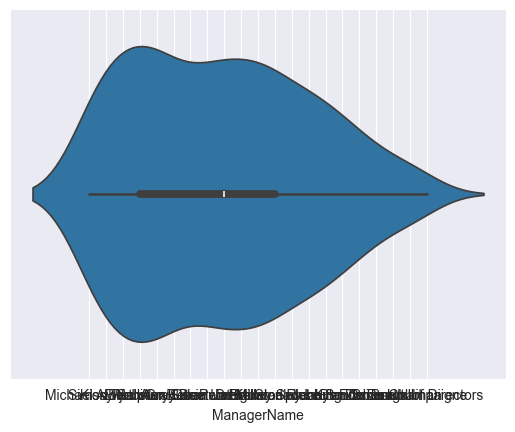

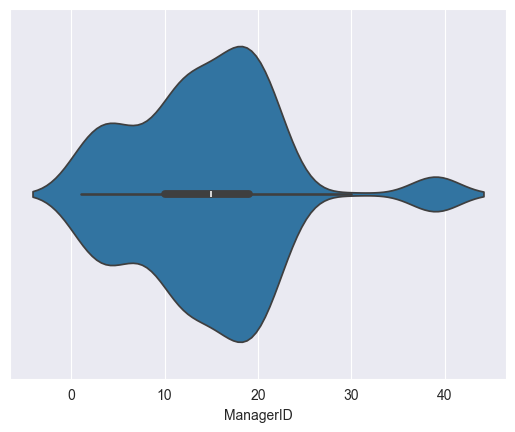

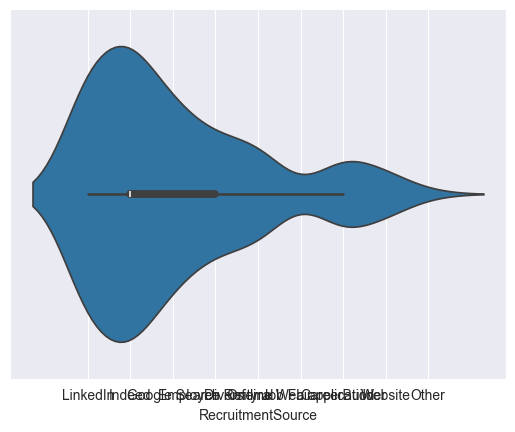

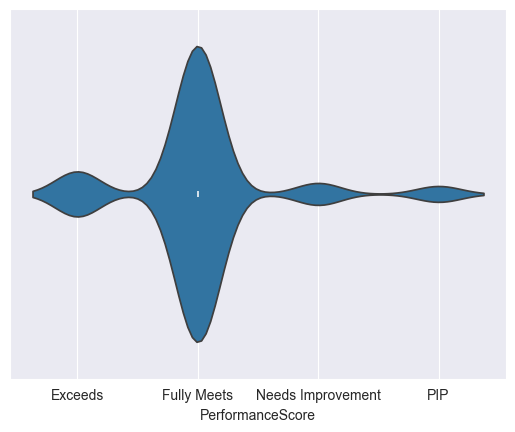

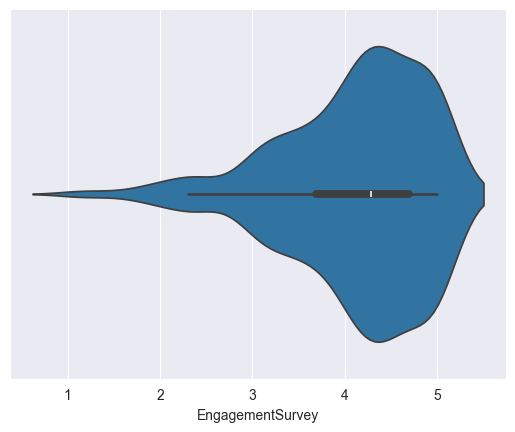

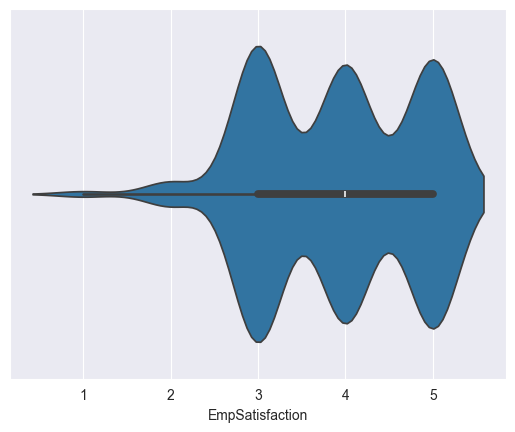

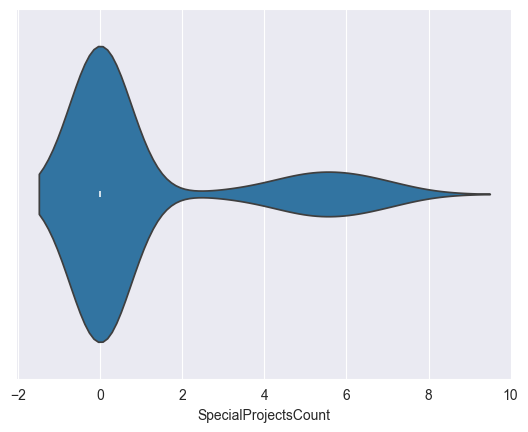

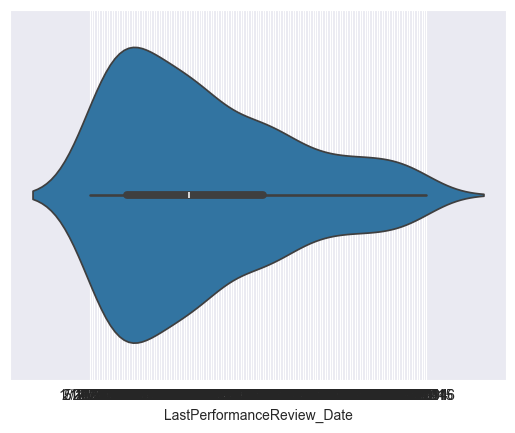

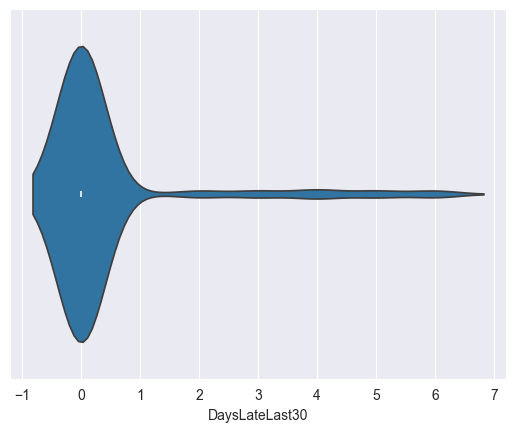

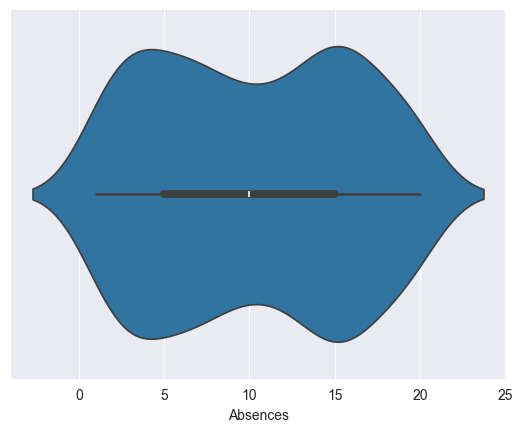

In [62]:
from matplotlib import pyplot as plt

for column in data.columns:
    sns.violinplot(x=data[column])
    plt.show()

In [65]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
le = LabelEncoder()
data = data.drop(columns=["EmpID", "DOB", "Zip", "Termd", "TermReason", "ManagerName", "ManagerID", "DaysLateLast30", "DateofTermination", "Sex", "MaritalDesc", "DateofHire", "LastPerformanceReview_Date"])
data["EmploymentStatus"] = le.fit_transform(data["EmploymentStatus"])
data["Position"] = le.fit_transform(data["Position"])
data["State"] = le.fit_transform(data["State"])
data["CitizenDesc"] = le.fit_transform(data["CitizenDesc"])
data["HispanicLatino"] = le.fit_transform(data["HispanicLatino"])
data["RaceDesc"] = le.fit_transform(data["RaceDesc"])
data["Department"] = le.fit_transform(data["Department"])
data["RecruitmentSource"] = le.fit_transform(data["RecruitmentSource"])
data["PerformanceScore"] = le.fit_transform(data["PerformanceScore"])
train, test = train_test_split(data, test_size=0.2, random_state=42)
train.head()
regr_X_train = train.drop("Salary", axis=1)
regr_X_test = test.drop("Salary", axis=1)
regr_Y_train = train["Salary"]
regr_Y_test = test["Salary"]

In [72]:
import numpy as np


class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df._append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()    

In [73]:
regr_models = {'LR': LinearRegression()}
regrMetricLogger = MetricLogger()

In [74]:
from skimage.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score


def regr_train_model(model_name, model, regrMetricLogger):
    model.fit(regr_X_train, regr_Y_train)
    Y_pred = model.predict(regr_X_test)
    
    mae = mean_absolute_error(regr_Y_test, Y_pred)
    mse = mean_squared_error(regr_Y_test, Y_pred)
    r2 = r2_score(regr_Y_test, Y_pred)

    regrMetricLogger.add('MAE', model_name, mae)
    regrMetricLogger.add('MSE', model_name, mse)
    regrMetricLogger.add('R2', model_name, r2)    
    
    print('{} \t MAE={}, MSE={}, R2={}'.format(
        model_name, round(mae, 3), round(mse, 3), round(r2, 3)))

In [75]:
for model_name, model in regr_models.items():
    regr_train_model(model_name, model, regrMetricLogger)

LR 	 MAE=14446.225, MSE=612095105.795, R2=0.244


Исходя из этих метрик качества, можно сделать вывод что линейная регрессия совершенно не подходит для анализа данного датасета.
В данном датасете присутсвует множество категориальных данных, а значит метод градиентного бустинга или случайного леса оказался бы здесь более удачным